In [22]:
%matplotlib inline
import matplotlib.pyplot
import seaborn as sns
sns.set(rc={'figure.figsize':(15,6)})
import pandas as pd
from sklearn import tree
import numpy as np
np.random.seed(0)

In [10]:
train_data = pd.read_csv('train_iris.csv', index_col=0)
test_data  = pd.read_csv('test_iris.csv', index_col=0)



In [11]:
train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [12]:
test_data.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [15]:
X_train = train_data.drop(['species'], axis=1)
X_test = test_data.drop(['species'], axis=1)

In [16]:
y_train = train_data.species
y_test = test_data.species

In [9]:
clf =tree.DecisionTreeClassifier(random_state=0, criterion='entropy')

In [27]:
max_depth_values = range(1,15)
scores_data = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
#     mean_cross_val = cross_val_score(clf, X_train,y_train, cv=5).mean()
    test_score = clf.score(X_test,y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score],
                                   'test_score':[test_score],
#                                    'cross_val_score':[mean_cross_val]
                                   })
    scores_data = scores_data.append(temp_score_data)

In [29]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score','test_score'],
                          var_name='set_type',
                          value_name='score')

In [30]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


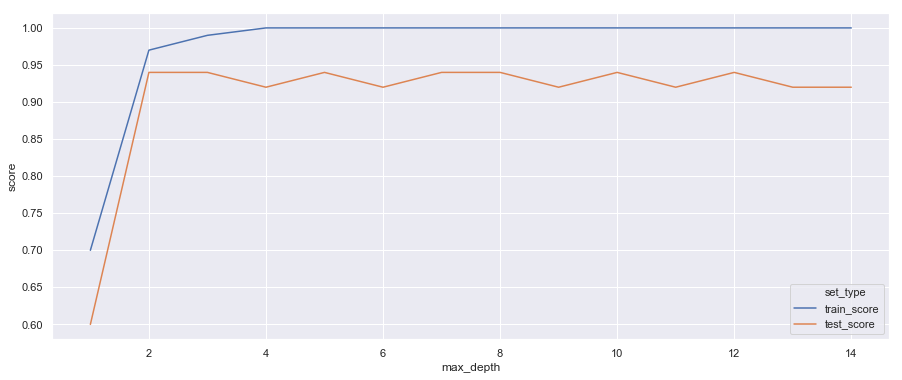

In [31]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)